In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
#set path to google drive
path = "/content/drive/MyDrive/Colab Notebooks/"
#import dataset
data = pd.read_csv(path + "Titanic-Dataset.csv")
#create copy of dataset
titanic = data.copy()
#print info about dataset and dtypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
#View the first 10 rows
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
#Type cast Age to integer
titanic['Age'] = titanic['Age'].astype(int)

In [83]:

# Impute null values in Age column with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [85]:
#Impute null in Embarked column with the Mode S
titanic['Embarked'] = titanic['Embarked'].replace(np.nan , 'S')

In [86]:
#Create categories for age column
bins =[0,5,20,30,40,50,60,100]
labels = ["Infant", "Teen", "20s", "30s", "40s", "50s", "Elder"]
titanic["Age_Group"] = pd.cut(titanic["Age"], bins=bins, labels=labels)
titanic["Age_Group"] = titanic["Age_Group"].astype("category")

In [89]:
#Drop cabin, age, passenger_id, name columns & reset index
titanic = titanic.drop(['Cabin', 'Age', 'PassengerId', 'Name'], axis=1).reset_index(drop=True)
titanic = titanic.drop(['Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,1,0,7.2500,S,20s
1,1,1,female,1,0,71.2833,C,30s
2,1,3,female,0,0,7.9250,S,20s
3,1,1,female,1,0,53.1000,S,30s
4,0,3,male,0,0,8.0500,S,30s


#Exploratory Data Analysis
##Univariate Analysis



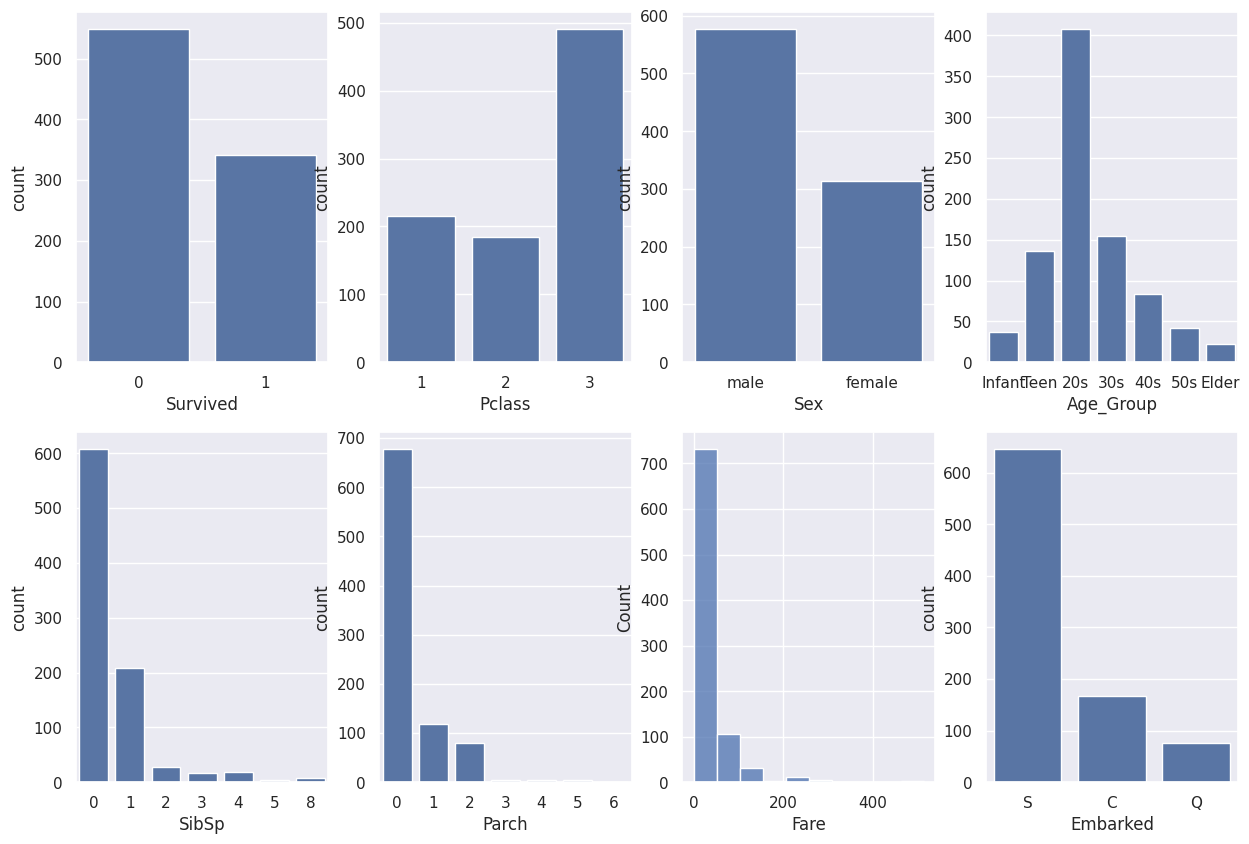

In [90]:
#Univariate Analysis

fig, ax = plt.subplots(2,4, figsize=(15,10))
sns.countplot(data=titanic, x="Survived", ax=ax[0,0])
sns.countplot(data=titanic, x="Pclass", ax=ax[0,1])
sns.countplot(data=titanic, x="Sex", ax=ax[0,2])
sns.countplot(data=titanic, x="Age_Group", ax=ax[0,3])
sns.countplot(data=titanic, x="SibSp", ax=ax[1,0])
sns.countplot(data=titanic, x="Parch", ax=ax[1,1])
sns.histplot(data=titanic, x="Fare",bins=10 , ax=ax[1,2])
sns.countplot(data=titanic, x="Embarked", ax=ax[1,3])
plt.show()

Visualize Relationships between features & the Response variable - Survived

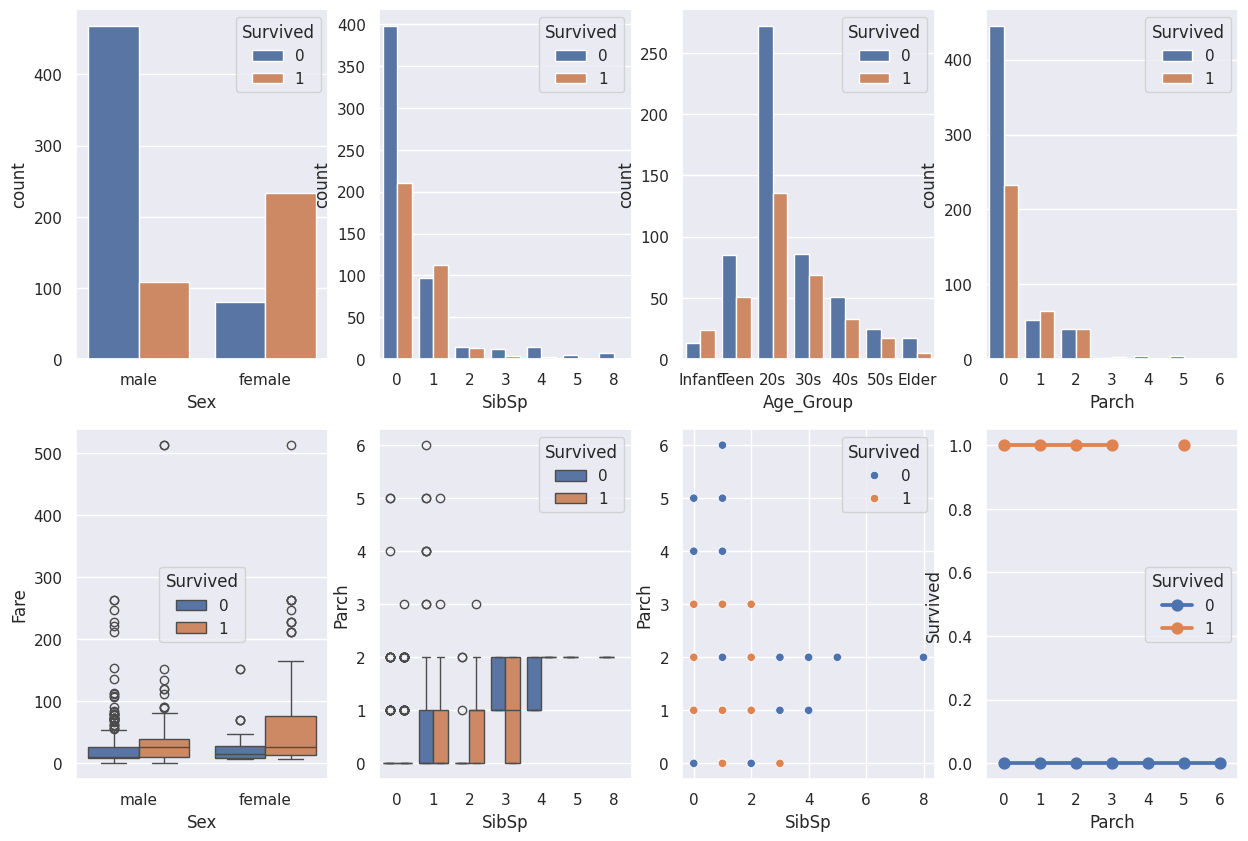

In [91]:
#plot the relationships between features
fig, ax = plt.subplots(2,4, figsize=(15,10))
sns.countplot(data=titanic, x="Sex", hue="Survived", ax=ax[0,0])
sns.countplot(data=titanic, x="SibSp", hue="Survived", ax=ax[0,1])
sns.countplot(data=titanic, x="Age_Group", hue="Survived", ax=ax[0,2])
sns.countplot(data=titanic, x="Parch", hue="Survived", ax=ax[0,3])
sns.boxplot(data=titanic, x="Sex", y="Fare", hue="Survived", ax=ax[1,0])
sns.boxplot(data=titanic, x="SibSp", y="Parch", hue="Survived", ax=ax[1,1])
sns.scatterplot(data=titanic, x="SibSp", y="Parch", hue="Survived", ax=ax[1,2])
sns.pointplot(data=titanic, x="Parch", y="Survived", hue="Survived", ax=ax[1,3])

plt.show()


###Further Insights where Survived = 1 (True)

In [92]:
#subset for rows where survival =1
survived_data = titanic.query("Survived == 1")

Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


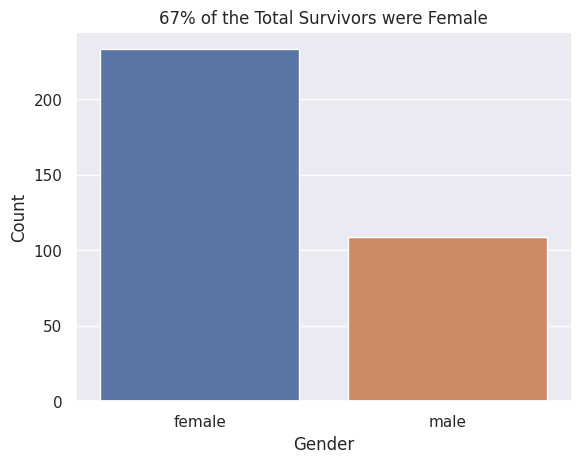

In [93]:
# plot distribution of Survivors by sex
print(survived_data['Sex'].value_counts(normalize=True))
sns.countplot(data=survived_data, x="Sex",hue='Sex', dodge=False)
plt.title("67% of the Total Survivors were Female")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


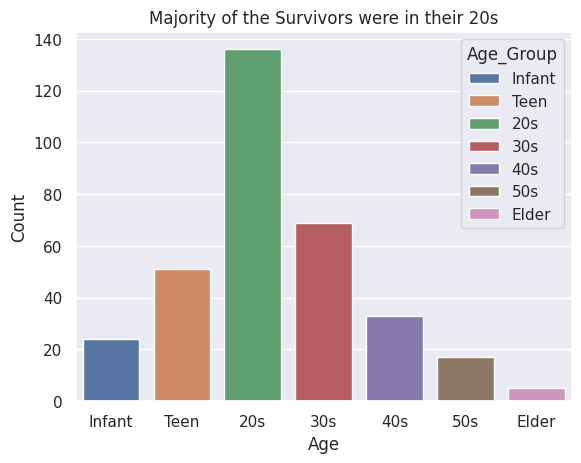

In [98]:
# Distribution of Age, where Survival = 1

sns.countplot(data=survived_data, x="Age_Group", hue='Age_Group')
plt.title("Majority of the Survivors were in their 20s")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [99]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,1,0,7.2500,S,20s
1,1,1,female,1,0,71.2833,C,30s
2,1,3,female,0,0,7.9250,S,20s
3,1,1,female,1,0,53.1000,S,30s
4,0,3,male,0,0,8.0500,S,30s


In [102]:
#Obtain dummy variables for the Sex and Embarked columns
model_data = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Age_Group'])


In [126]:
#Check for Multicollinearity
model_data.corr()


,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Infant,Age_Group_Teen,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_Elder
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.113341,-0.007713,-0.095449,0.057867,0.005983,0.009569,-0.051224
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053,0.077963,0.134542,0.188910,-0.119900,-0.160536,-0.208905,-0.136667
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734,0.248320,0.112897,-0.080505,-0.061964,-0.041584,-0.043083,-0.055819
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.257544,0.093371,-0.192074,0.014160,0.014046,-0.019898,-0.021502
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184,-0.007380,-0.026143,-0.122379,0.095482,0.062844,0.056295,0.029368
Sex_female,0.543351,-0.131900,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.070193,0.052730,-0.041423,-0.003867,0.011234,-0.008883,-0.071958
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.070193,-0.052730,0.041423,0.003867,-0.011234,0.008883,0.071958
Embarked_C,0.168240,-0.243292,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.028425,-0.013109,0.017684,-0.031984,0.001587,0.055249,-0.021229
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421,-0.023976,-0.041684,0.166280,-0.067385,-0.085559,-0.049561,0.002542
Embarked_S,-0.149683,0.074053,0.068734,0.060814,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000,0.039990,0.037716,-0.120133,0.070425,0.052452,-0.017212,0.016998


## Model Selection and Evaluation
###Decision Tree Classifier Model

In [103]:
# define X and y variables

X = model_data.drop('Survived', axis=1)
y = model_data['Survived']


#Logistic Regression Model

In [105]:
#import libraries for a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

In [123]:
#Fit the model
model_lr = LogisticRegression()
model_lr.fit(X, y)
print("Accuracy:", model_lr.score(X, y))


Accuracy: 0.8092031425364759


The Logistic Regression Classifier achieved an accuracy of 80.9%, i.e performs similar to the decision tree model

##Decision Tree Classification model

In [107]:
#  import libraries for a decision classifier, accuracy score, classification report and a confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [116]:
X1= X
y1 = y


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [118]:

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=10,  random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = model.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


[[94 11]
 [24 50]]


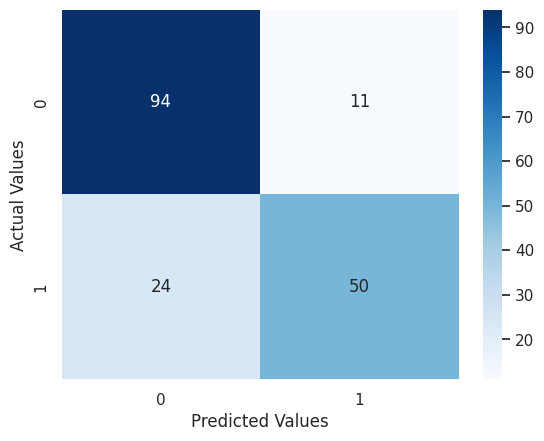

In [120]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [121]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



The decision tree classifier achieved an overall accuracy score of 80.4%. For the negative class i.e. those who did not survive the disaster, the precision was 80%, while for the positive class, i.e. those who survived, the precisiom was 82%. Our model works reasonably well but there is a possiblity of overfitting

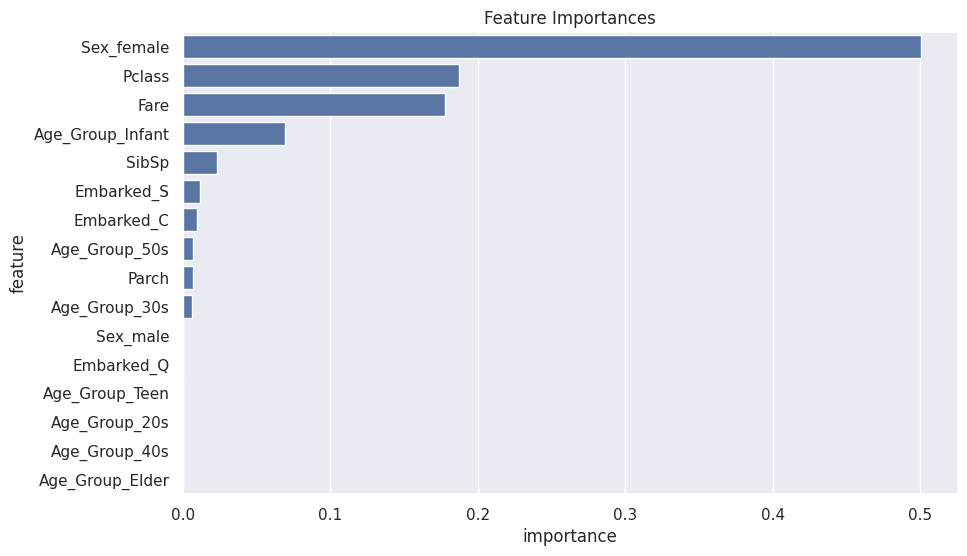

In [122]:
# generate feature importances
importances = model.feature_importances_

# dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()
